<a href="https://colab.research.google.com/github/disenodc/MachineLearning_UNS/blob/main/TP3_3_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP 3_3 SPOTIFY

En el notebook https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/musica.ipynb hay un dataset con 2000+ canciones de
Spotify de una usuaria, donde algunas fueron marcadas como gustadas y otras
no. Cada canción tiene a su vez 16 atributos (nombre, artista, duración,
bailable, etc.). Desarrollar un clasificador que prediga si una canción dada va a ser gustada o no. 

In [3]:
# Importo librerias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split

In [14]:
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.head(10)


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [83]:
x = attributes_spotify[['energy','loudness']].values
y = attributes_spotify['target'].values

In [89]:
# Separo los conjuntos en entrenamiento y prueba
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
print(attributes_spotify.groupby('target').size())


target
0     997
1    1020
dtype: int64


In [114]:
# Entreno el modelo

knn = neighbors.KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [115]:
#calculando precision del modelo
knn.score(X_train, y_train)

0.7216367017978921

In [116]:
#Calculo la precision del modelo
print(knn.score(X_test, y_test))

0.6064356435643564


Hacer FOR variando K y 

EL valor maximo -> valor K optimo = mayor score

Entrenar otro modelo K optimo

Matriz de confusion

([<matplotlib.axis.XTick at 0x7ff03f0f6a50>,
 <a list of 5 Text major ticklabel objects>)

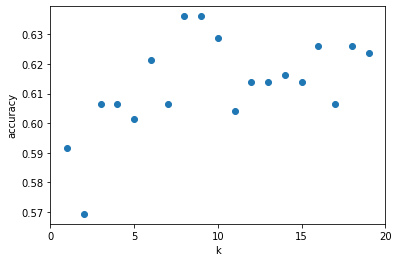

In [117]:
# Elegir el mejor valor de k y graficar score en funcion

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [118]:
#Prediccion Confusion Matrix

prediccion = knn.predict(X_test)

print(confusion_matrix(y_test, prediccion))
print(classification_report(y_test, prediccion))

print(prediccion)

[[131  69]
 [ 83 121]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       200
           1       0.64      0.59      0.61       204

    accuracy                           0.62       404
   macro avg       0.62      0.62      0.62       404
weighted avg       0.62      0.62      0.62       404

[1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0

In [119]:
#reviso correlacion
attributes_spotify_corr = attributes_spotify.corr()

attributes_spotify_corr

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
Unnamed: 0,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


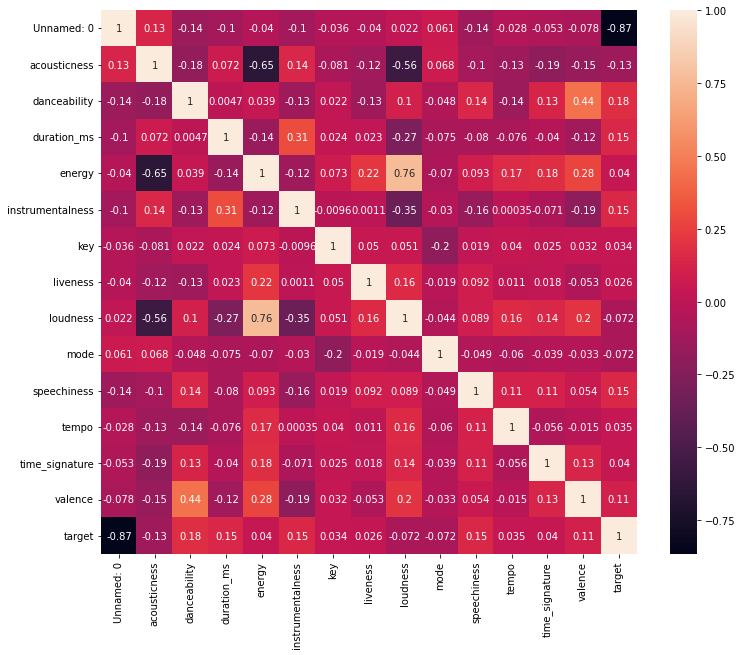

In [120]:
# Matriz de confusion

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(attributes_spotify_corr, annot=True);
